In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Building a dataset

Text(0, 0.5, 'Sy')

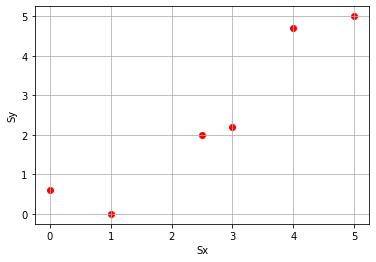

In [2]:
Sx = np.array([0, 1, 2.5, 3, 4, 5])
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5])

# Plotting in graph
plt.scatter(Sx, Sy, color='r')

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

Lets assume a line 

$$y = mx + c$$

Where $m$ and $c$ are unknown, which we are trying to find.

We assume a random value for $m$ and $c$ ($m = 2$ and $c = 2$)

In [3]:
m1 = tf.Variable(2, dtype=tf.float32)
m2 = tf.Variable(2, dtype=tf.float32)
m3 = tf.Variable(2, dtype=tf.float32)
m4 = tf.Variable(2, dtype=tf.float32)
m5 = tf.Variable(2, dtype=tf.float32)
c = tf.Variable(2, dtype=tf.float32)

def line_fn(x):
  return ((-m1*(np.sin(x))**5)*6 + (-m2*(np.sin(x))**4)*(2.2) + (m3*(np.sin(x))**3)*4.2 + (m4*(np.sin(x))**2)/1.2 + (m5*(np.sin(x)))/1.2 + c/6)/2.0

Text(0, 0.5, 'Sy')

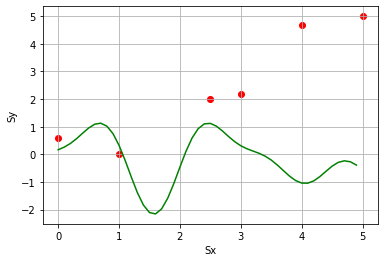

In [4]:
p = np.arange(0, 5, 0.1)
plt.plot(p, line_fn(p).numpy(), color='g')

# Plotting in graph
plt.scatter(Sx, Sy, color='r')

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

#### Partial derivatives:

$\frac{\partial \;\; loss(l(x), y)}{\partial m} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)x$

$\frac{\partial \;\; loss(l(x), y)}{\partial c} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)$

In [5]:
# learning rate
lr = 0.01
total_steps = 90000

for step in range(total_steps):
    print(f"Step {step+1:2}:")
    print("-"*100)

    with tf.GradientTape() as tape:
        # Printing value of the variables
        print(f"M1: {m1.numpy():.4f}, M2: {m2.numpy():.4f}, M3: {m3.numpy():.4f}, , M4: {m4.numpy():.4f}, , M5: {m5.numpy():.4f} C: {c.numpy():.4f}")
        
        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([m1, m2, m3, m4, m5, c])

        # Passing the points to the line function
        pred_y = line_fn(Sx)
        print(f"pred_y: {pred_y}")

        # Calculating the difference/loss of the output (pred_y) of the function w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)
        print(f"loss: {loss}")


    # Calculating the gradients w.r.t. the partially diff. parameters and the generated output loss
    grads = tape.gradient(loss, [m1, m2, m3, m4, m5, c])

    # Showing the output just for educational purposs
    print(f"M1_grad: {grads[0].numpy():.2f}, M2_grad: {grads[1].numpy():.2f}, M3_grad: {grads[2].numpy():.2f}, , M4_grad: {grads[3].numpy():.2f}, , M5_grad: {grads[4].numpy():.2f} C_grad: {grads[5].numpy():.2f}")

    # Updating the gradients
    m1 = m1 - lr * grads[0]
    m2 = m2 - lr * grads[1]
    m3 = m3 - lr * grads[2]
    m4 = m4 - lr * grads[3]
    m5 = m5 - lr * grads[4]
    c = c - lr * grads[5]

    print()

Streaming output truncated to the last 5000 lines.
Step 89376:
----------------------------------------------------------------------------------------------------
M1: -8.0817, M2: 2.6720, M3: -16.5727, , M4: 11.8207, , M5: 22.0746 C: 8.9255
pred_y: [ 0.74379444 -0.01016855  2.0367775   2.0422516   4.7060075   4.9970217 ]
loss: [2.06768345e-02 1.03399456e-04 1.35258422e-03 2.48845760e-02
 3.60921149e-05 8.87041915e-06]
M1_grad: 0.00, M2_grad: 0.00, M3_grad: 0.01, , M4_grad: 0.00, , M5_grad: -0.01 C_grad: 0.00

Step 89377:
----------------------------------------------------------------------------------------------------
M1: -8.0818, M2: 2.6719, M3: -16.5727, , M4: 11.8207, , M5: 22.0747 C: 8.9255
pred_y: [ 0.7437923  -0.01016927  2.0367763   2.042254    4.706008    4.9970226 ]
loss: [2.0676218e-02 1.0341401e-04 1.3524966e-03 2.4883825e-02 3.6097845e-05
 8.8647394e-06]
M1_grad: 0.00, M2_grad: 0.00, M3_grad: 0.01, , M4_grad: 0.00, , M5_grad: -0.01 C_grad: 0.00

Step 89378:
-------------

## Lets check the final result

Text(0, 0.5, 'Sy')

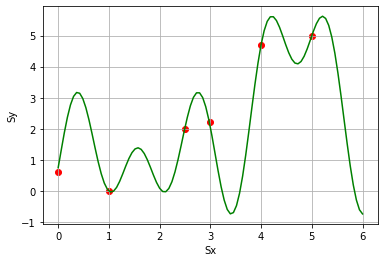

In [6]:
p = np.arange(0, 5, 0.1)
xp = np.linspace(0, 6, 100)
plt.plot(xp, line_fn(xp).numpy(), color='g')

# Plotting in graph
plt.scatter(Sx, Sy, color='r')

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')